In [1]:
# !pip install odfpy
# !pip install seaborn
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yaml
from yaml import Loader
import numpy as np
import analyze_cells_energy as ace
import utils
from scipy.stats import ttest_ind, mannwhitneyu
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
root_directory = '/home/stella/Documents/Torino/projects/'
experiment = 'SexualImprinting'
experimental_group = 'C57_MaleUrine_Exposure_cFos'
data_directory = root_directory + experiment + '/' \
                + experimental_group + '/'
subjects = [name for name in os.listdir(data_directory) \
                if os.path.isdir(os.path.join(data_directory, name))]

In [3]:
# load query file where we added volumes for each area
volumes = pd.read_csv("query_volumes_reordered.csv")
volumes = ace.clean_volumes_database(volumes)

In [4]:
def load_subject(subject):
    df_mouse = pd.read_csv(data_directory + subject + '/cells300.csv')
    df_mouse = ace.reformat_df_mouse(df=df_mouse)
    return df_mouse

# Analysis on C57 : threshold 300

In [5]:
dict_results_across_mice = np.load('dict_results/dict_results_across_mice_c57.npy', allow_pickle=True).item()

In [6]:
experimental_groups = utils.divide_in_exp_groups(list_subjects=subjects)

In [7]:
df_control_cell_count, df_fam_cell_count, df_unfam_cell_count = \
ace.calculate_value_across_groups(experimental_groups=experimental_groups, 
                              dict_results_across_mice=dict_results_across_mice, 
                              value='n_cells')
# rename areas with acronyms
for df in [df_control_cell_count, df_fam_cell_count, df_unfam_cell_count]:
    for i in df.index:
        df.at[i, 'area'] = volumes[volumes['safe_name'] == \
                                   df.at[i, 'area']]['acronym'].values[0]
# remove null values
df_control_cell_count = df_control_cell_count.set_index('area').loc[
        ~(df_control_cell_count.set_index('area')==0).all(axis=1)].dropna(axis=0)
df_fam_cell_count = df_fam_cell_count.set_index('area').loc[
        ~(df_fam_cell_count.set_index('area')==0).all(axis=1)].dropna(axis=0)
df_unfam_cell_count = df_unfam_cell_count.set_index('area').loc[
        ~(df_unfam_cell_count.set_index('area')==0).all(axis=1)].dropna(axis=0)
indexes_intersect = df_unfam_cell_count.index.intersection(df_fam_cell_count.index)
df_fam_cell_count = df_fam_cell_count.loc[indexes_intersect]
df_unfam_cell_count = df_unfam_cell_count.loc[indexes_intersect]

In [8]:
corr_matrix_fam_ncells = df_fam_cell_count.T.corr(method='pearson')

In [9]:
corr_matrix_unfam_ncells = df_unfam_cell_count.T.corr(method='pearson')

## Plot cross corr matrix across groups per area on cell count

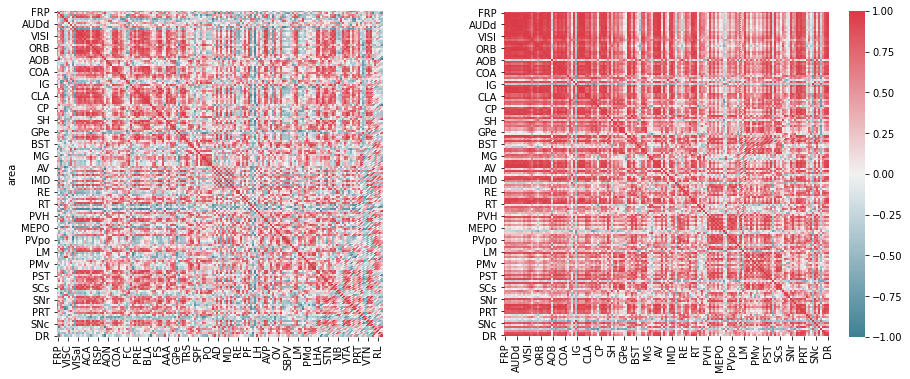

In [10]:
f, ax = plt.subplots(1,2, figsize=(16, 6))

sns.heatmap(corr_matrix_fam_ncells,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, cbar=False, ax=ax[0])
sns.heatmap(corr_matrix_unfam_ncells,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax[1])
ax[1].set_ylabel('')
ax[0].set_xlabel('')
ax[1].set_xlabel('')
plt.savefig('/home/stella/Documents/Torino/projects/SexualImprinting/figures/corr_all_c57_wF_fam_unfam.png')

# C57 WITHOUT FATHER

In [11]:
root_directory = '/home/stella/Documents/Torino/projects/'
experiment = 'SexualImprinting'
experimental_group = 'BL_woF'
data_directory = root_directory + experiment + '/' \
                + experimental_group + '/'
subjects = [name for name in os.listdir(data_directory) \
                if os.path.isdir(os.path.join(data_directory, name))]

In [12]:
dict_results_across_mice = np.load('dict_results/dict_results_across_mice_BL_woF2000.npy', allow_pickle=True).item()
experimental_groups = utils.divide_in_exp_groups(list_subjects=subjects)
df_control_cell_count, df_fam_cell_count, df_unfam_cell_count = \
ace.calculate_value_across_groups(experimental_groups=experimental_groups, 
                              dict_results_across_mice=dict_results_across_mice, 
                              value='n_cells')
# rename areas with acronyms
for df in [df_control_cell_count, df_fam_cell_count, df_unfam_cell_count]:
    for i in df.index:
        df.at[i, 'area'] = volumes[volumes['safe_name'] == \
                                   df.at[i, 'area']]['acronym'].values[0]
# remove null values
df_control_cell_count = df_control_cell_count.set_index('area').loc[
        ~(df_control_cell_count.set_index('area')==0).all(axis=1)].dropna(axis=0)
df_fam_cell_count = df_fam_cell_count.set_index('area').loc[
        ~(df_fam_cell_count.set_index('area')==0).all(axis=1)].dropna(axis=0)
df_unfam_cell_count = df_unfam_cell_count.set_index('area').loc[
        ~(df_unfam_cell_count.set_index('area')==0).all(axis=1)].dropna(axis=0)
indexes_intersect = df_unfam_cell_count.index.intersection(df_fam_cell_count.index)
df_fam_cell_count = df_fam_cell_count.loc[indexes_intersect]
df_unfam_cell_count = df_unfam_cell_count.loc[indexes_intersect]

corr_matrix_fam_ncells = df_fam_cell_count.T.corr(method='pearson')
corr_matrix_unfam_ncells = df_unfam_cell_count.T.corr(method='pearson')

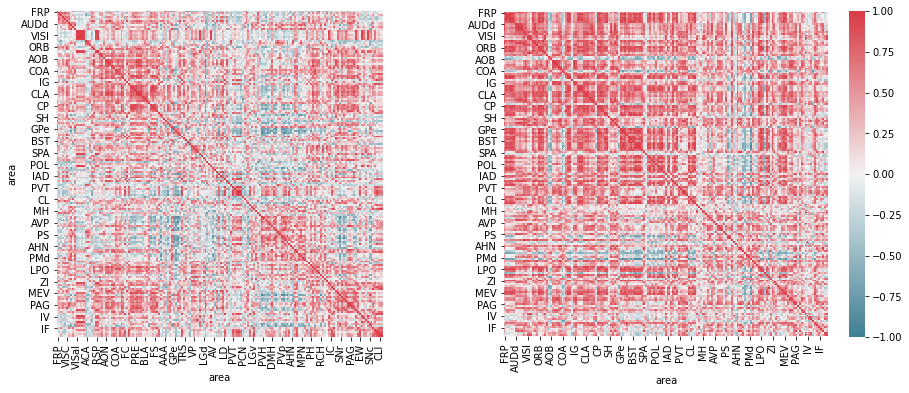

In [13]:
f, ax = plt.subplots(1,2, figsize=(16, 6))

sns.heatmap(corr_matrix_fam_ncells,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, cbar=False, ax=ax[0])
sns.heatmap(corr_matrix_unfam_ncells,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax[1])
ax[1].set_ylabel('')
plt.savefig('/home/stella/Documents/Torino/projects/SexualImprinting/figures/corr_all_c57_woF_fam_unfam.png')